### import the datasets 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("..\Data-raw\crop_production.csv")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# Data Exploration

In [5]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
# Droping Nan Values
data = df.dropna()
print(data.shape)
test = df[~df["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(242361, 7)
(3730, 6)


In [115]:
#for i in data.columns:
    #print("column name :",i)
    #print("No. of column :",len(data[i].unique()))
    #print(data[i].unique())

In [7]:
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_1772\1048416122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)


In [8]:
data[["State_Name" ,"District_Name" , "Season" , "Crop" ]]

,State_Name,District_Name,Season,Crop
0,Andaman and Nicobar Islands,NICOBARS,Kharif,Arecanut
1,Andaman and Nicobar Islands,NICOBARS,Kharif,Other Kharif pulses
2,Andaman and Nicobar Islands,NICOBARS,Kharif,Rice
3,Andaman and Nicobar Islands,NICOBARS,Whole Year,Banana
4,Andaman and Nicobar Islands,NICOBARS,Whole Year,Cashewnut
...,...,...,...,...
246086,West Bengal,PURULIA,Summer,Rice
246087,West Bengal,PURULIA,Summer,Sesamum
246088,West Bengal,PURULIA,Whole Year,Sugarcane
246089,West Bengal,PURULIA,Winter,Rice


In [117]:
data[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07


# Data Visulization

In [118]:
data.groupby("Season",axis=0).agg({"Production":np.sum})

,Production
Season,
Autumn,6.441377e+07
Kharif,4.029970e+09
Rabi,2.051688e+09
Summer,1.706579e+08
Whole Year,1.344248e+11
Winter,4.345498e+08


In [119]:
data["Crop"].value_counts()[:5]

Crop
Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: count, dtype: int64

In [120]:
top_crop_pro = data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08


## Each type of crops required various area & various season. so, I'm going to pic top crop from this data

### 1.Rice

In [121]:
rice_df = data[data["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(15082, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00,2.273756e-07
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00,2.125005e-07
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84,3.618459e-07


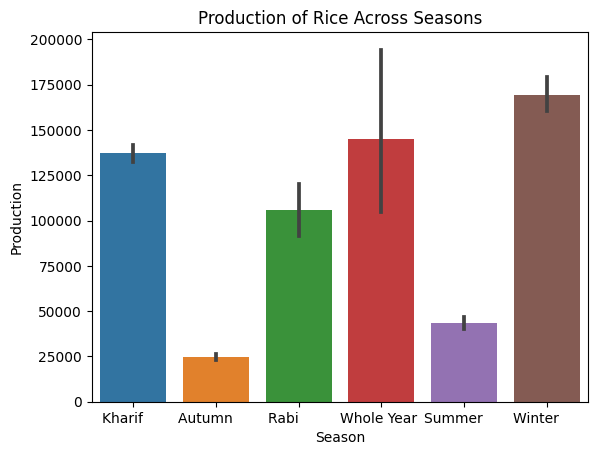

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'rice_df' is your DataFrame containing the data
sns.barplot(x="Season", y="Production", data=rice_df)

# Adding labels and title
plt.xlabel("Season")
plt.ylabel("Production")
plt.title("Production of Rice Across Seasons")

# Show the plot
plt.show()


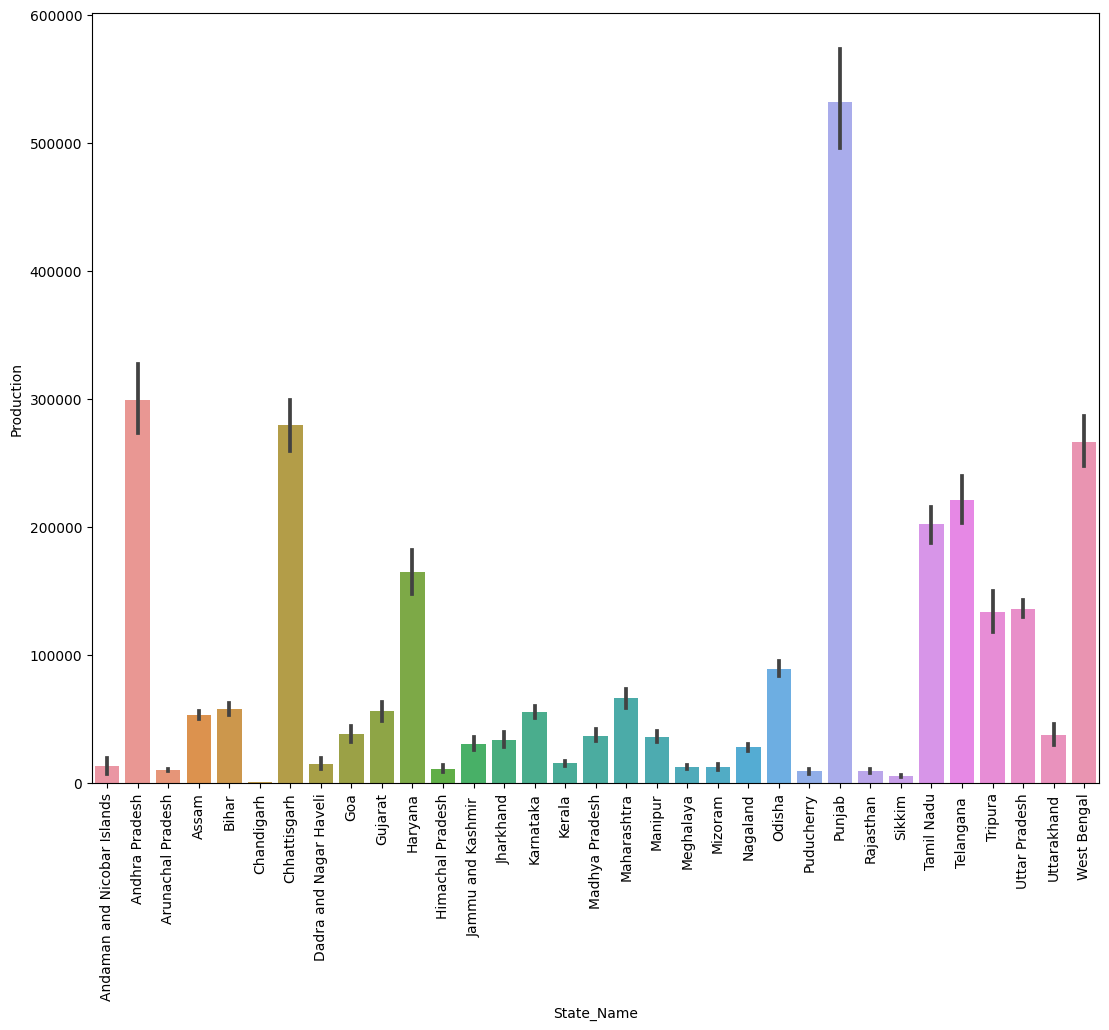

In [123]:
plt.figure(figsize=(13, 10))
sns.barplot(x="State_Name", y="Production", data=rice_df)
plt.xticks(rotation=90)
plt.show()


In [124]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:5]

,District_Name,Production,precent_of_pro
58,BARDHAMAN,34239976.0,2.132707
374,MEDINIPUR WEST,29192719.0,1.818328
612,WEST GODAVARI,27845309.0,1.734402
169,EAST GODAVARI,24690929.0,1.537925
494,SANGRUR,24448000.0,1.522794


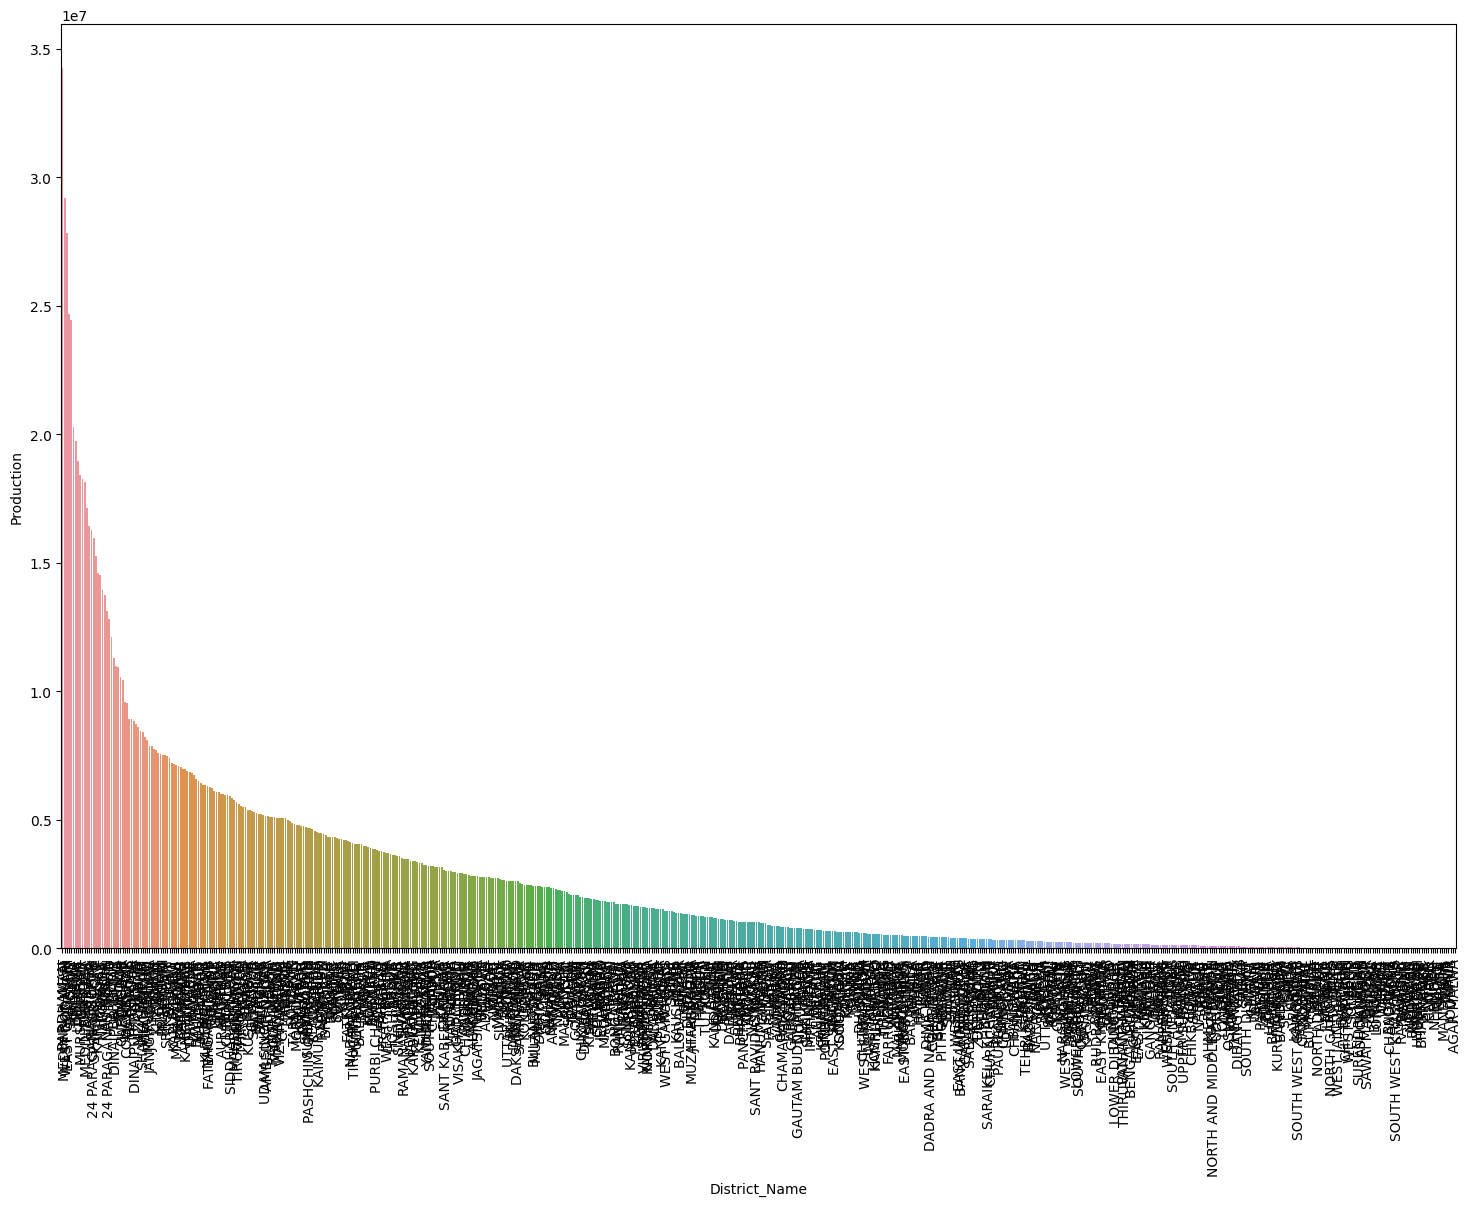

In [125]:
plt.figure(figsize=(18, 12))
sns.barplot(x="District_Name", y="Production", data=top_rice_pro_dis)
plt.xticks(rotation=90)
plt.show()


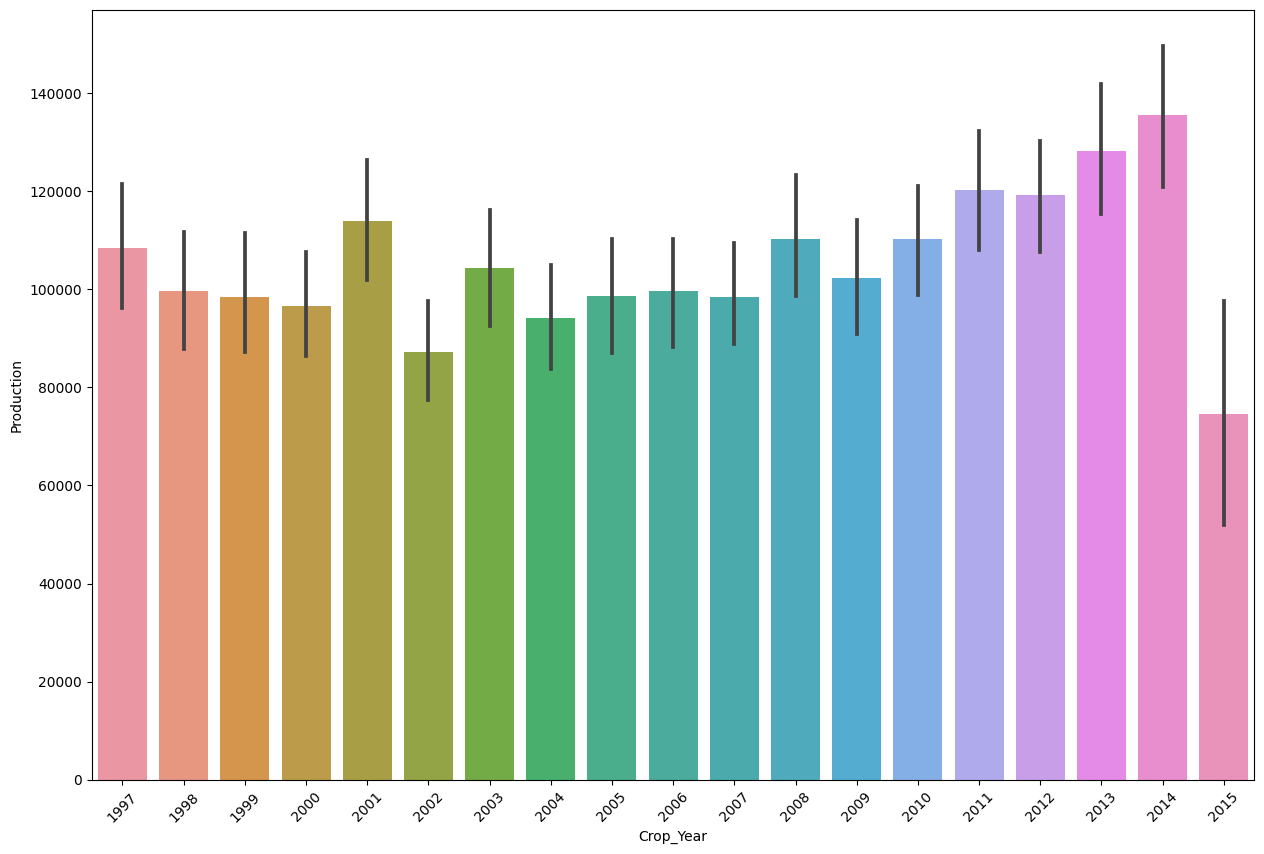

In [126]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Crop_Year", y="Production", data=rice_df)
plt.xticks(rotation=45)
plt.show()


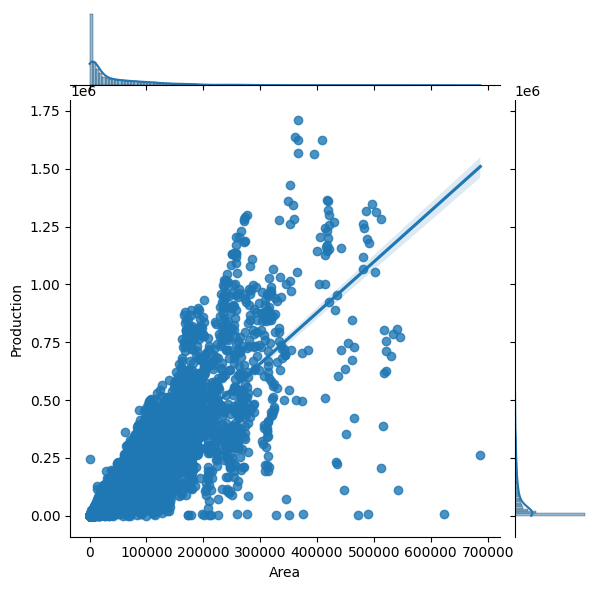

In [127]:
sns.jointplot(x="Area", y="Production", data=rice_df, kind="reg")
plt.show()


# Insights:
From Data Visualization:
Rice production is mostly depends on Season, Area, State(place).

# 2. Coconut

In [128]:
coc_df = data[data["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df[:3]

(1958, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,0.046113
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0,0.045638
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.0,67490000.0,0.047806


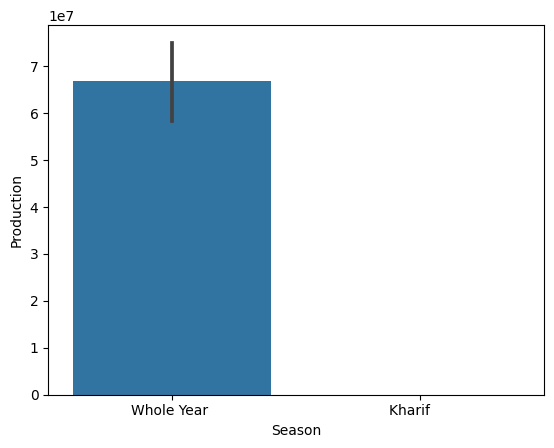

In [129]:
sns.barplot(x="Season", y="Production", data=coc_df)
plt.show()


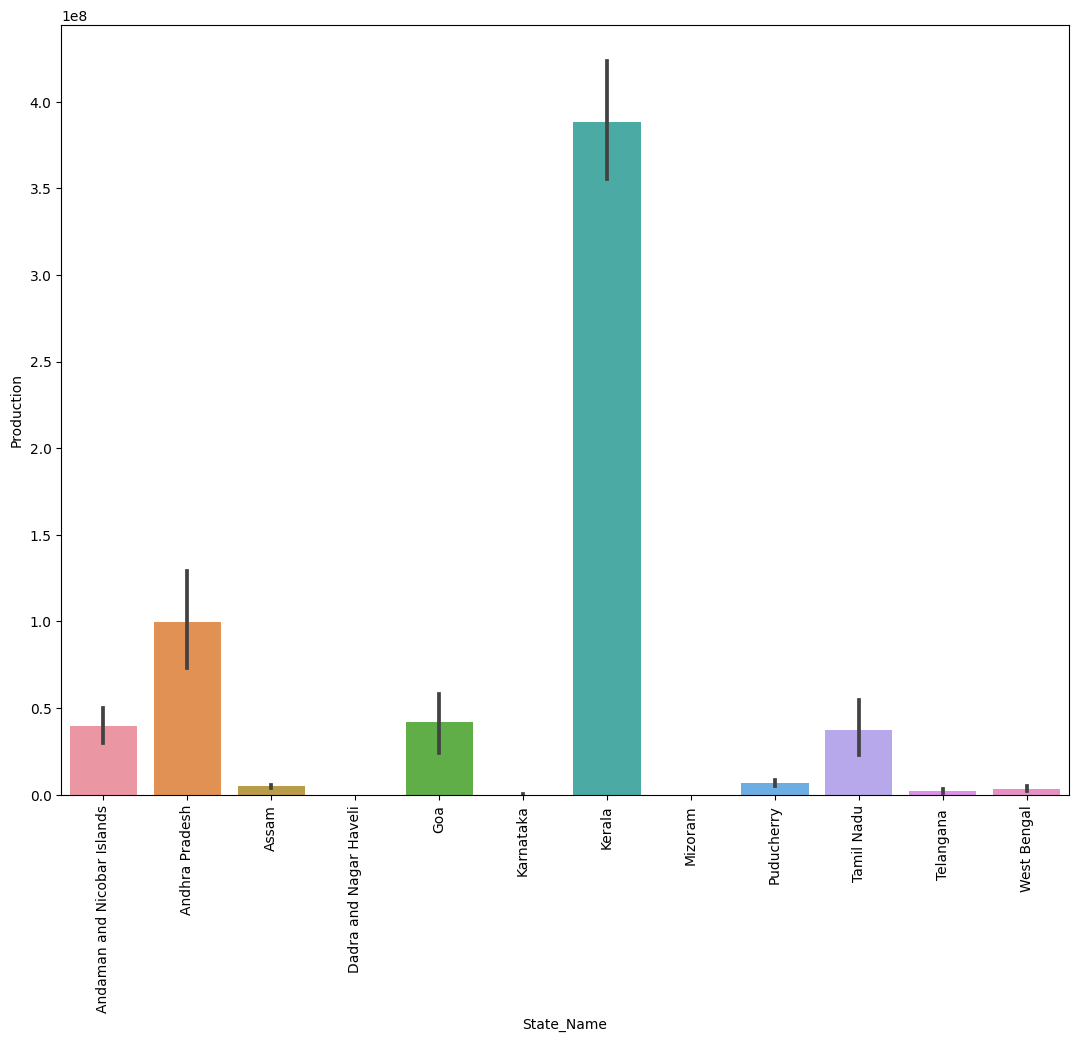

In [130]:
plt.figure(figsize=(13, 10))
sns.barplot(x="State_Name", y="Production", data=coc_df)
plt.xticks(rotation=90)
plt.show()


In [131]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent_of_pro
77,KOZHIKODE,1.527871e+10,11.754512
86,MALAPPURAM,1.451252e+10,11.165052
129,THIRUVANANTHAPURAM,1.001337e+10,7.703678
131,THRISSUR,9.920739e+09,7.632416
64,KANNUR,9.780310e+09,7.524379


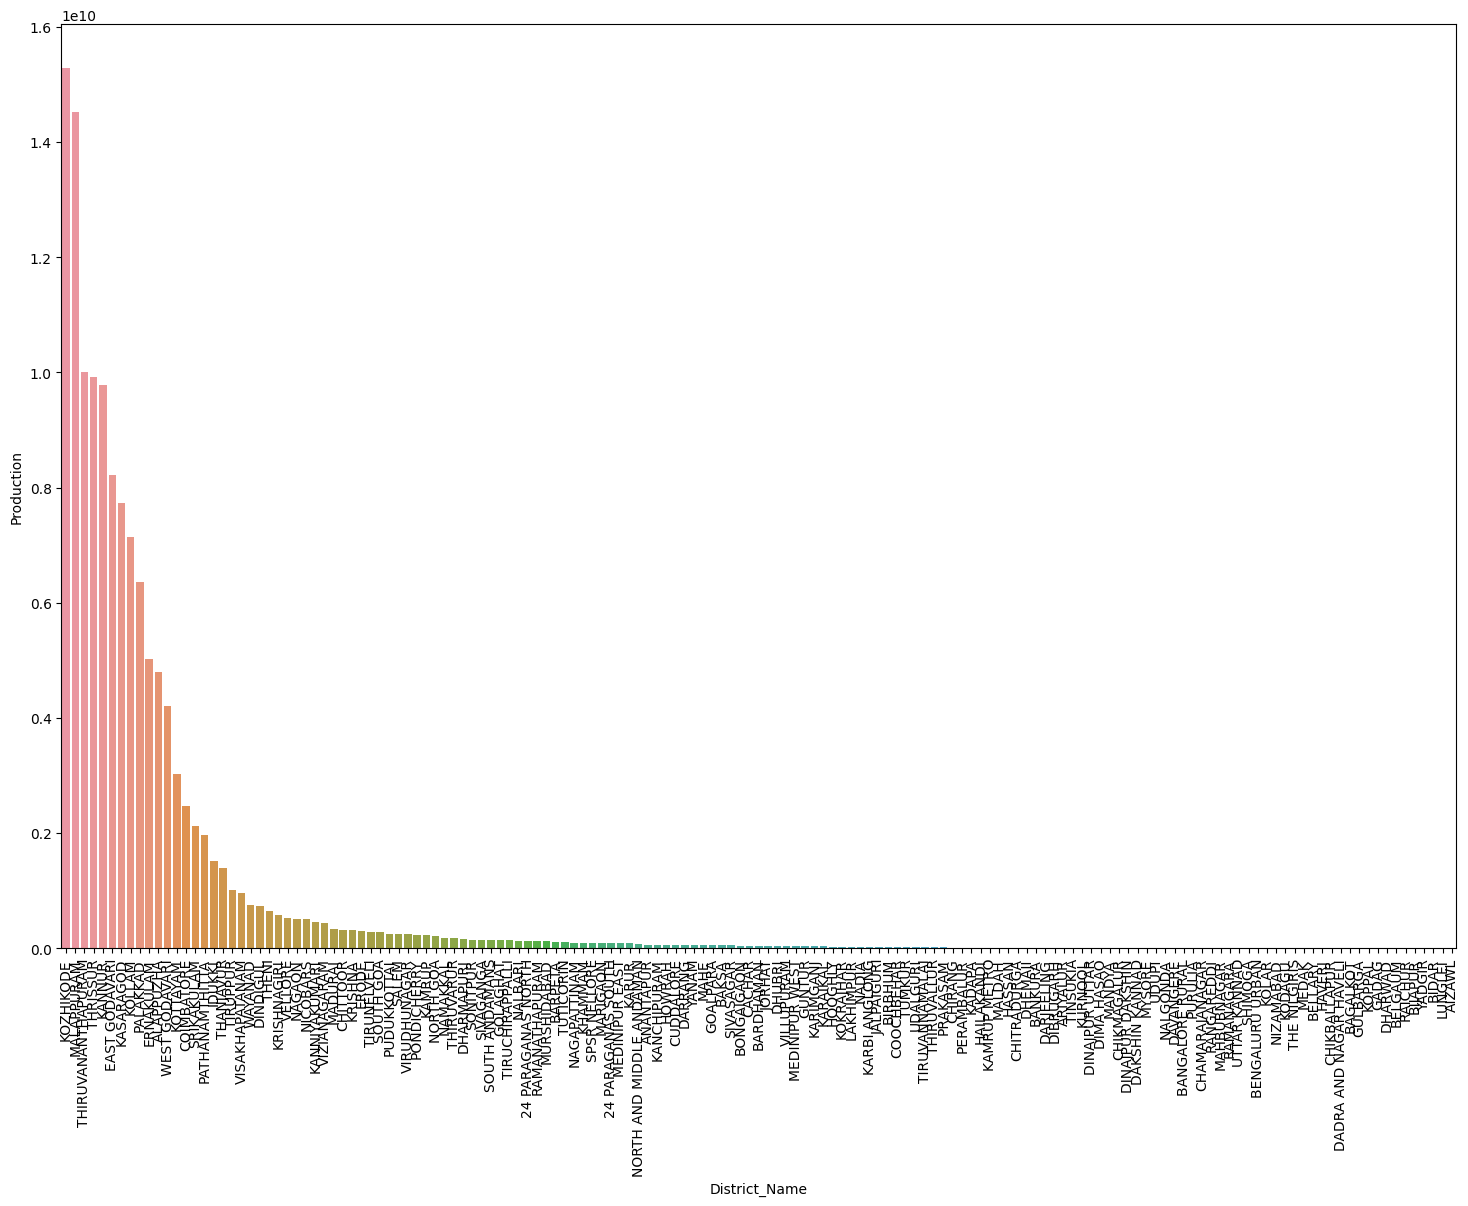

In [132]:
plt.figure(figsize=(18, 12))
sns.barplot(x="District_Name", y="Production", data=top_coc_pro_dis)
plt.xticks(rotation=90)
plt.show()


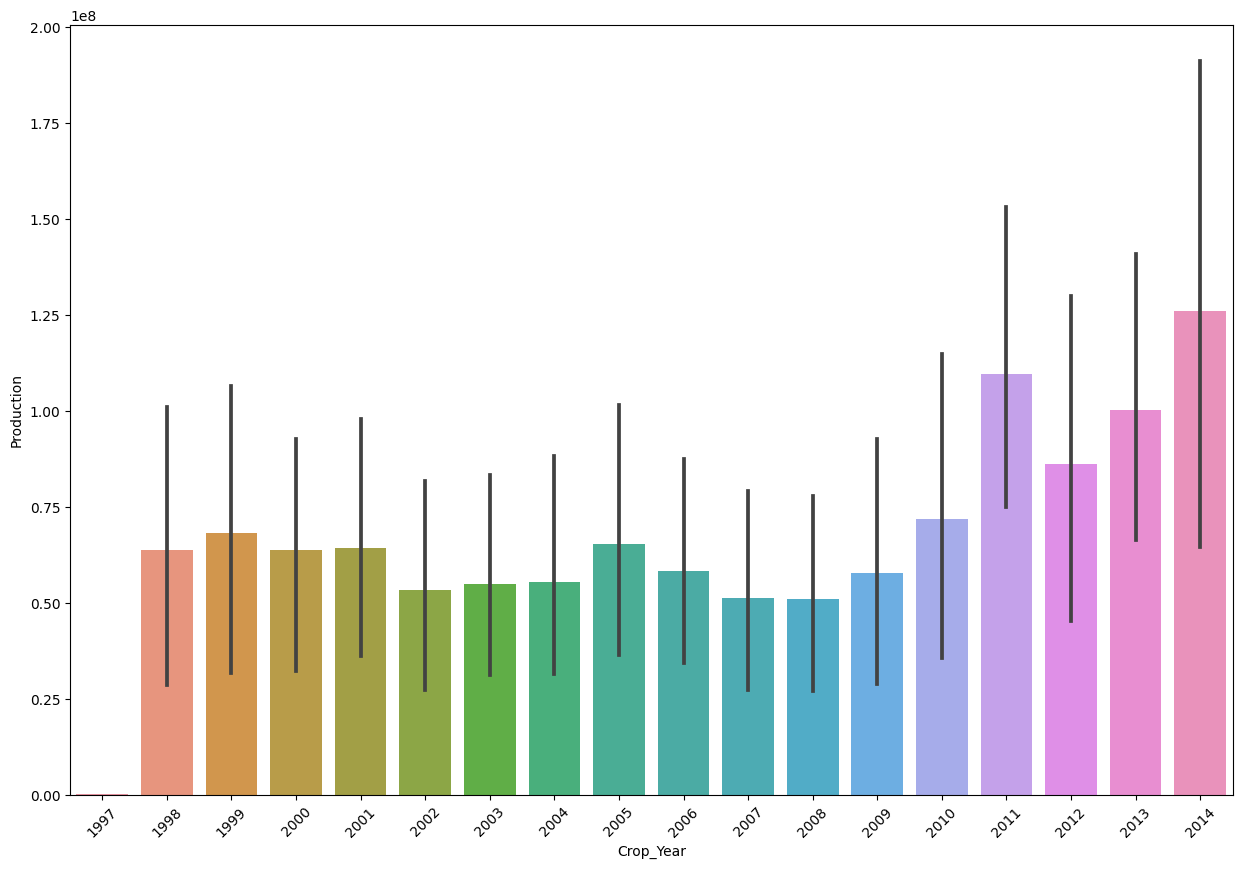

In [133]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year", y="Production", data=coc_df)
plt.xticks(rotation=45)
plt.show()


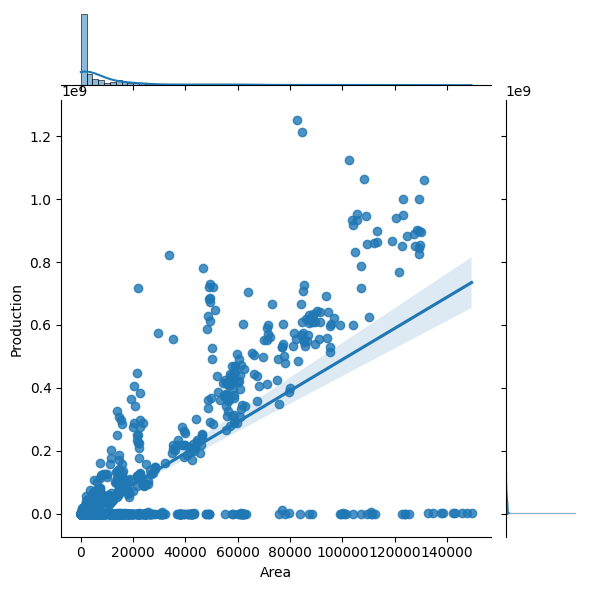

In [134]:
sns.jointplot(x="Area", y="Production", data=coc_df, kind="reg")


# Insight from Cocunut Production

* cocunut production is directly proportional to area
* its production is also gradually increasing over a time of period
* production is highin kerala state
* it does not depends on season

# 3. Sugarcane

In [135]:
sug_df = data[data["Crop"]=="Sugarcane"]
print(sug_df.shape)
sug_df[:3]

(7827, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,1.416670e-09
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.0,7.083351e-10
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.0,2.833340e-08


<Axes: xlabel='Season', ylabel='Production'>

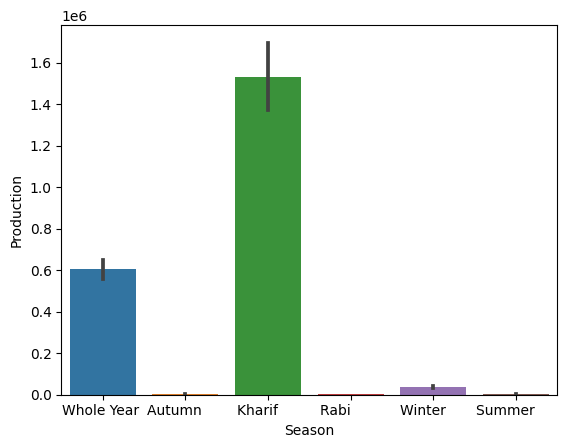

In [136]:
sns.barplot(x="Season", y="Production", data=sug_df)


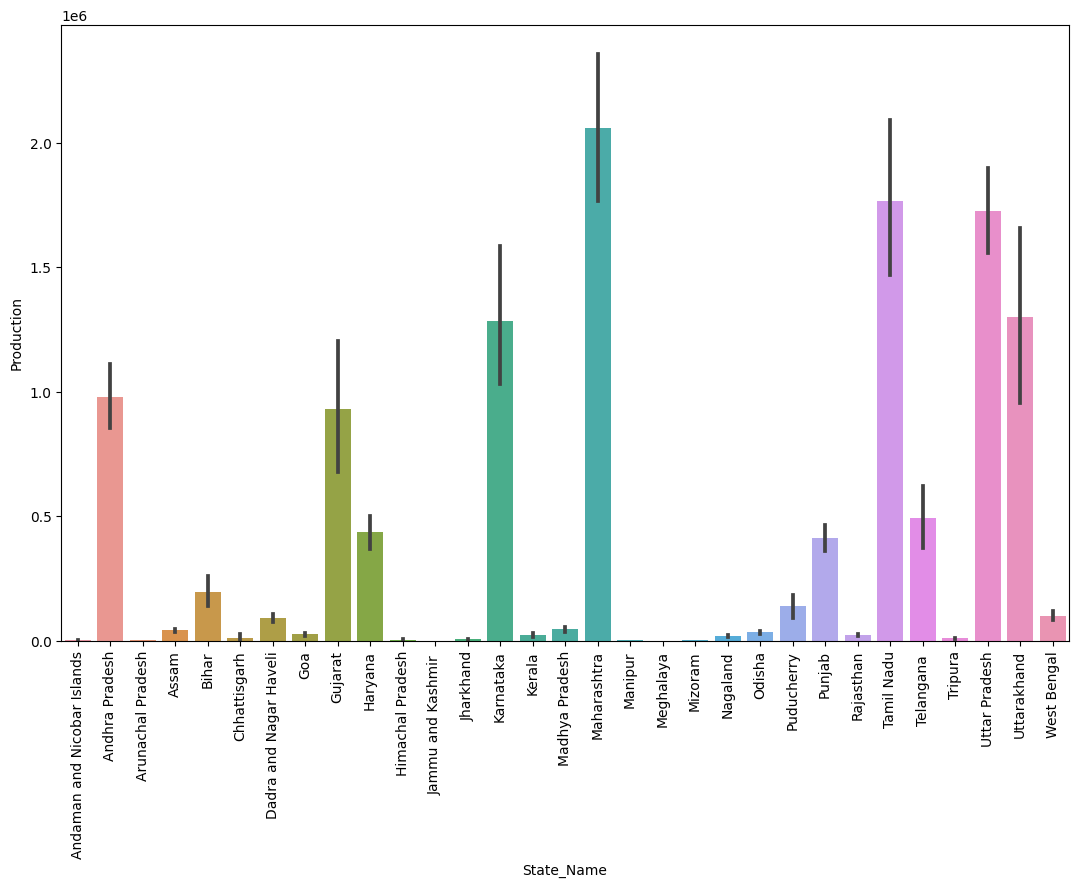

In [137]:
plt.figure(figsize=(13, 8))
sns.barplot(x="State_Name", y="Production", data=sug_df)
plt.xticks(rotation=90)
plt.show()


In [138]:
top_sug_pro_dis = sug_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_sug_pro_dis[:5]
sum_max = top_sug_pro_dis["Production"].sum()
top_sug_pro_dis["precent_of_pro"] = top_sug_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_sug_pro_dis[:5]

,District_Name,Production,precent_of_pro
360,MUZAFFARNAGAR,258698795.0,4.673296
81,BIJNOR,230907185.0,4.171251
283,KHERI,224383685.0,4.053407
63,BELGAUM,198207649.0,3.580546
294,KOLHAPUR,157210426.0,2.839947


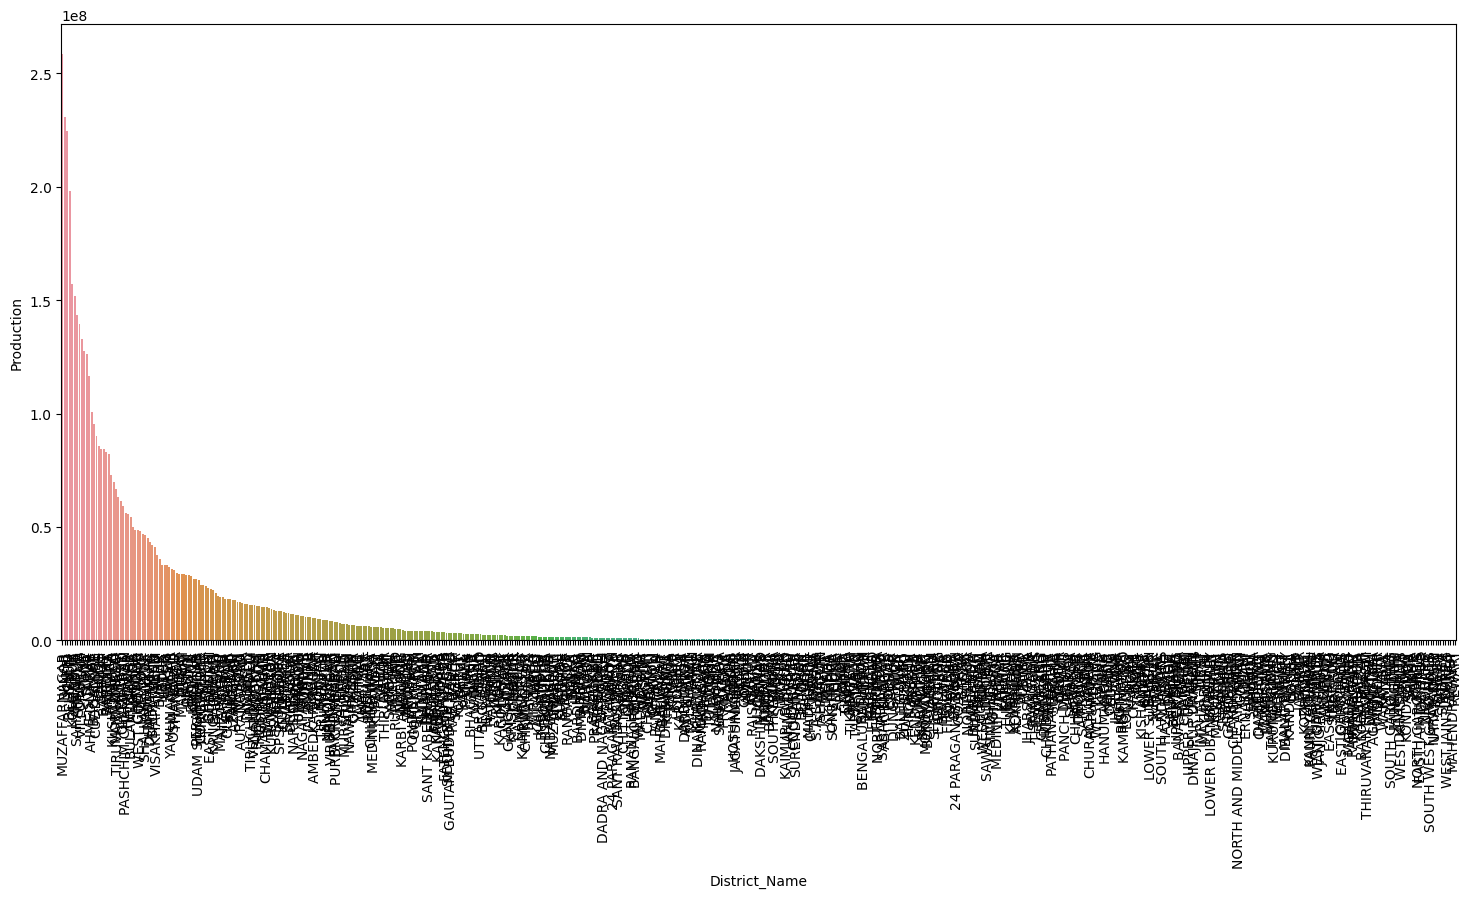

In [139]:
plt.figure(figsize=(18, 8))
sns.barplot(x="District_Name", y="Production", data=top_sug_pro_dis)
plt.xticks(rotation=90)
plt.show()



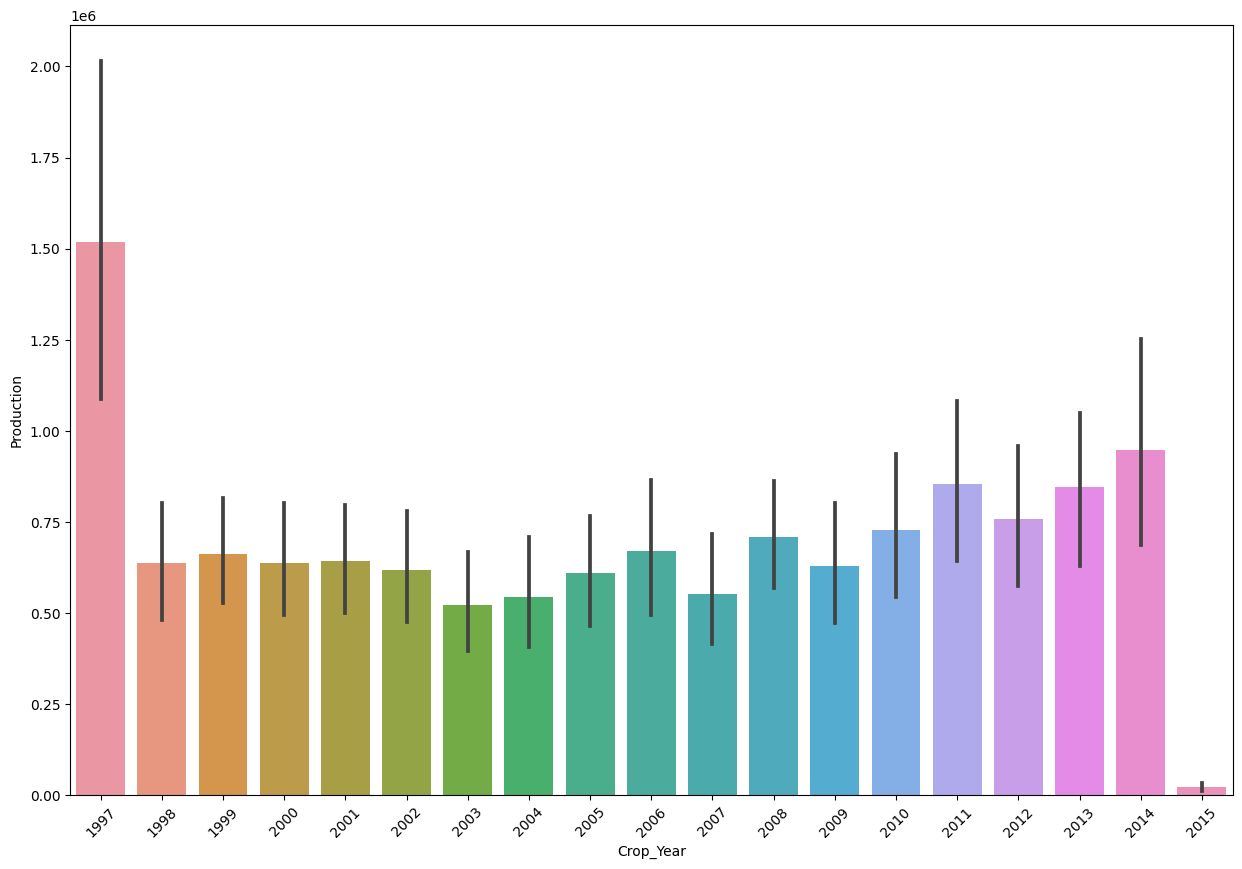

In [141]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Crop_Year", y="Production", data=sug_df)
plt.xticks(rotation=45)
plt.show()


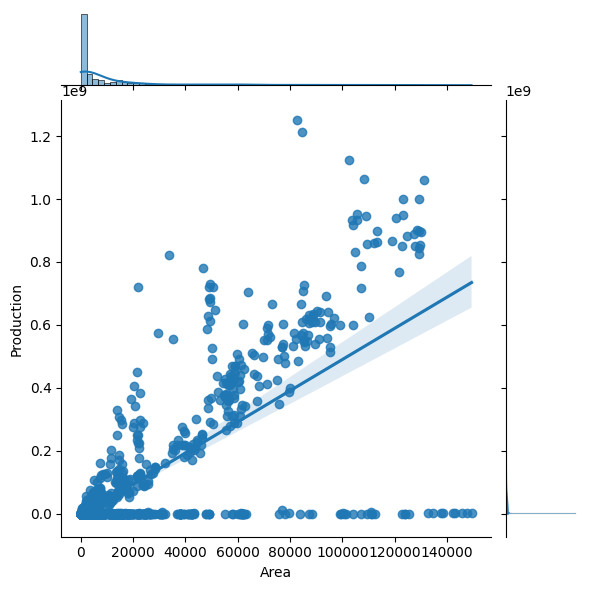

In [143]:
sns.jointplot(x="Area", y="Production", data=coc_df, kind="reg")


# Insighits:
* Sugarecane production is directly proportional to area
* And the production is high in some state only.

# Feature Selection

In [144]:
data1 = data.drop(["District_Name","Crop_Year"],axis=1)
data1.head()

,State_Name,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,Whole Year,Cashewnut,720.0,165.0,1.168753e-07


In [145]:
data_dum = pd.get_dummies(data1)
data_dum[:5]

,Area,Production,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1.416670e-06,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.0,1.0,7.083351e-10,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,102.0,321.0,2.273756e-07,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,176.0,641.0,4.540428e-07,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,720.0,165.0,1.168753e-07,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Test Train Split

In [146]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)


x_train : (162381, 165)
x_test : (79980, 165)
y_train : (162381, 1)
y_test : (79980, 1)


In [147]:
x_test.head()

,Area,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
51163,5467.0,3.208050e-06,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
55141,830.0,3.010424e-07,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
104122,9.0,1.799171e-07,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
161230,13.0,4.958346e-09,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
229232,117.0,9.208356e-08,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [148]:
x_train[:5]

,Area,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
4843,785.0,1.486087e-06,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20626,1250.0,5.829598e-07,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
240277,2.0,1.452087e-07,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20664,60.0,4.646678e-07,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
157859,605.0,6.729184e-08,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Model 1: XGBRegresor

In [149]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [152]:
from sklearn.metrics import mean_squared_error, r2_score

preds = xgbr.predict(x_test)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 30543388460228.254
R^2 Score: 0.9046965195011305


# Model 2: Decision Tree

In [153]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [154]:
preds = regressor.predict(x_test)

mean_squared_error(y_test,preds)
r2_score(y_test,preds)

0.9989780499428523

In [155]:
preds = regressor.predict(x_test)
preds

array([ 4355.        ,   435.        ,   111.66666667, ...,
       26631.        ,   207.        , 97796.        ])

In [ ]:
x_test[:1]

,Area,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
51163,5467.0,0.000003,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
